# Performing basic EDA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv('house.csv')

About the data

In [12]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#Firstly checking for the unique values in each categorical data.

In [57]:
def uni(cols):
    for i in cols:
        a = df[i].unique()
        print('unique values in'+' '+i+' '+'are:',a)

In [58]:
uni(['city','animal','furniture','rooms', 'bathroom','floor'])

unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
unique values in animal are: ['acept' 'not acept']
unique values in furniture are: ['furnished' 'not furnished']
unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
unique values in floor are: ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


In [ ]:
#Now checking for if there are any null values in our data, as we can there are no null values.

In [15]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

Lets check is there any relation between two entities like rooms and area.

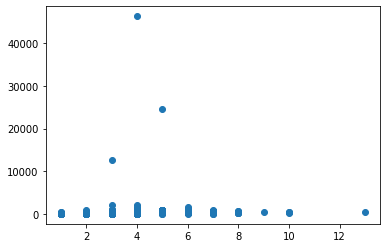

In [16]:
plt.scatter(df['rooms'],df['area'])

In the same way lets check that is there any relation between rent amount and area.

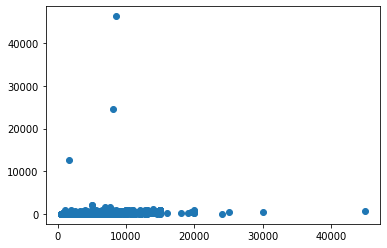

In [17]:
plt.scatter(df['rent amount (R$)'],df['area'])

Now lets check if there is any raise in rent amount if numbers of room increases,from the plot there is a increse in rent amount if the number of rooms increased.

Text(0, 0.5, 'rent')

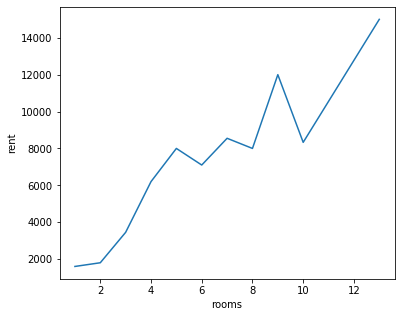

In [18]:
plt.figure(figsize=(6,5))
df.groupby('rooms')['rent amount (R$)'].median().plot()
plt.xlabel('rooms')
plt.ylabel('rent')

Now lets do a multivariate ananlysis to check relation with respect to each and every feature,
but from the plot it clearly shows that some of the data on y-axis linearly increased if the data on x-axsis increased as well.

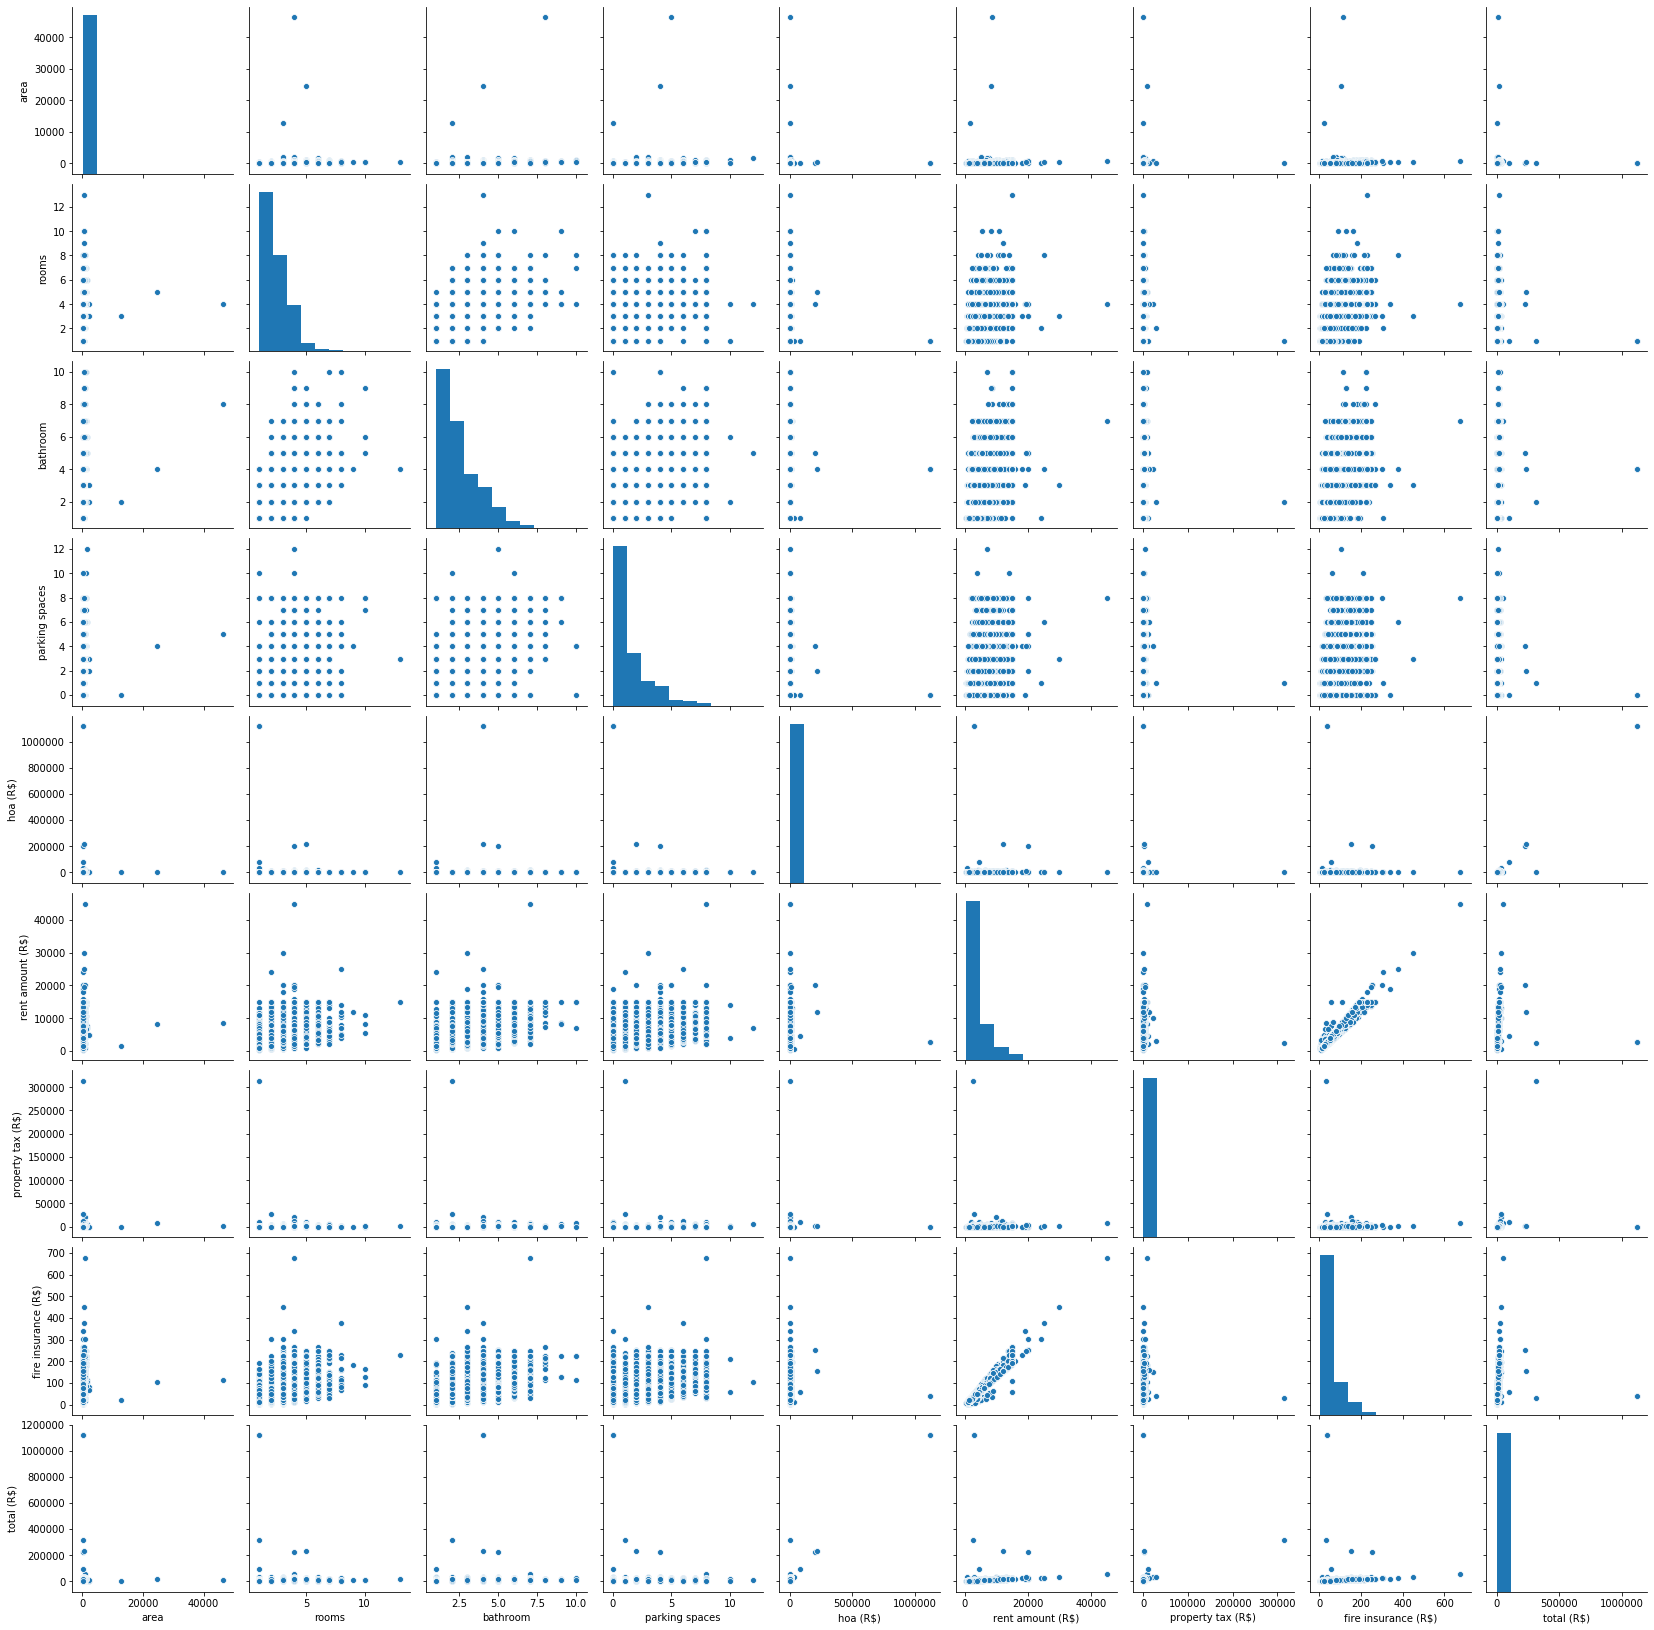

In [19]:
sns.pairplot(df)

Here,we checked for pearson correlation with respect to each and every feature and most of them are co-related.

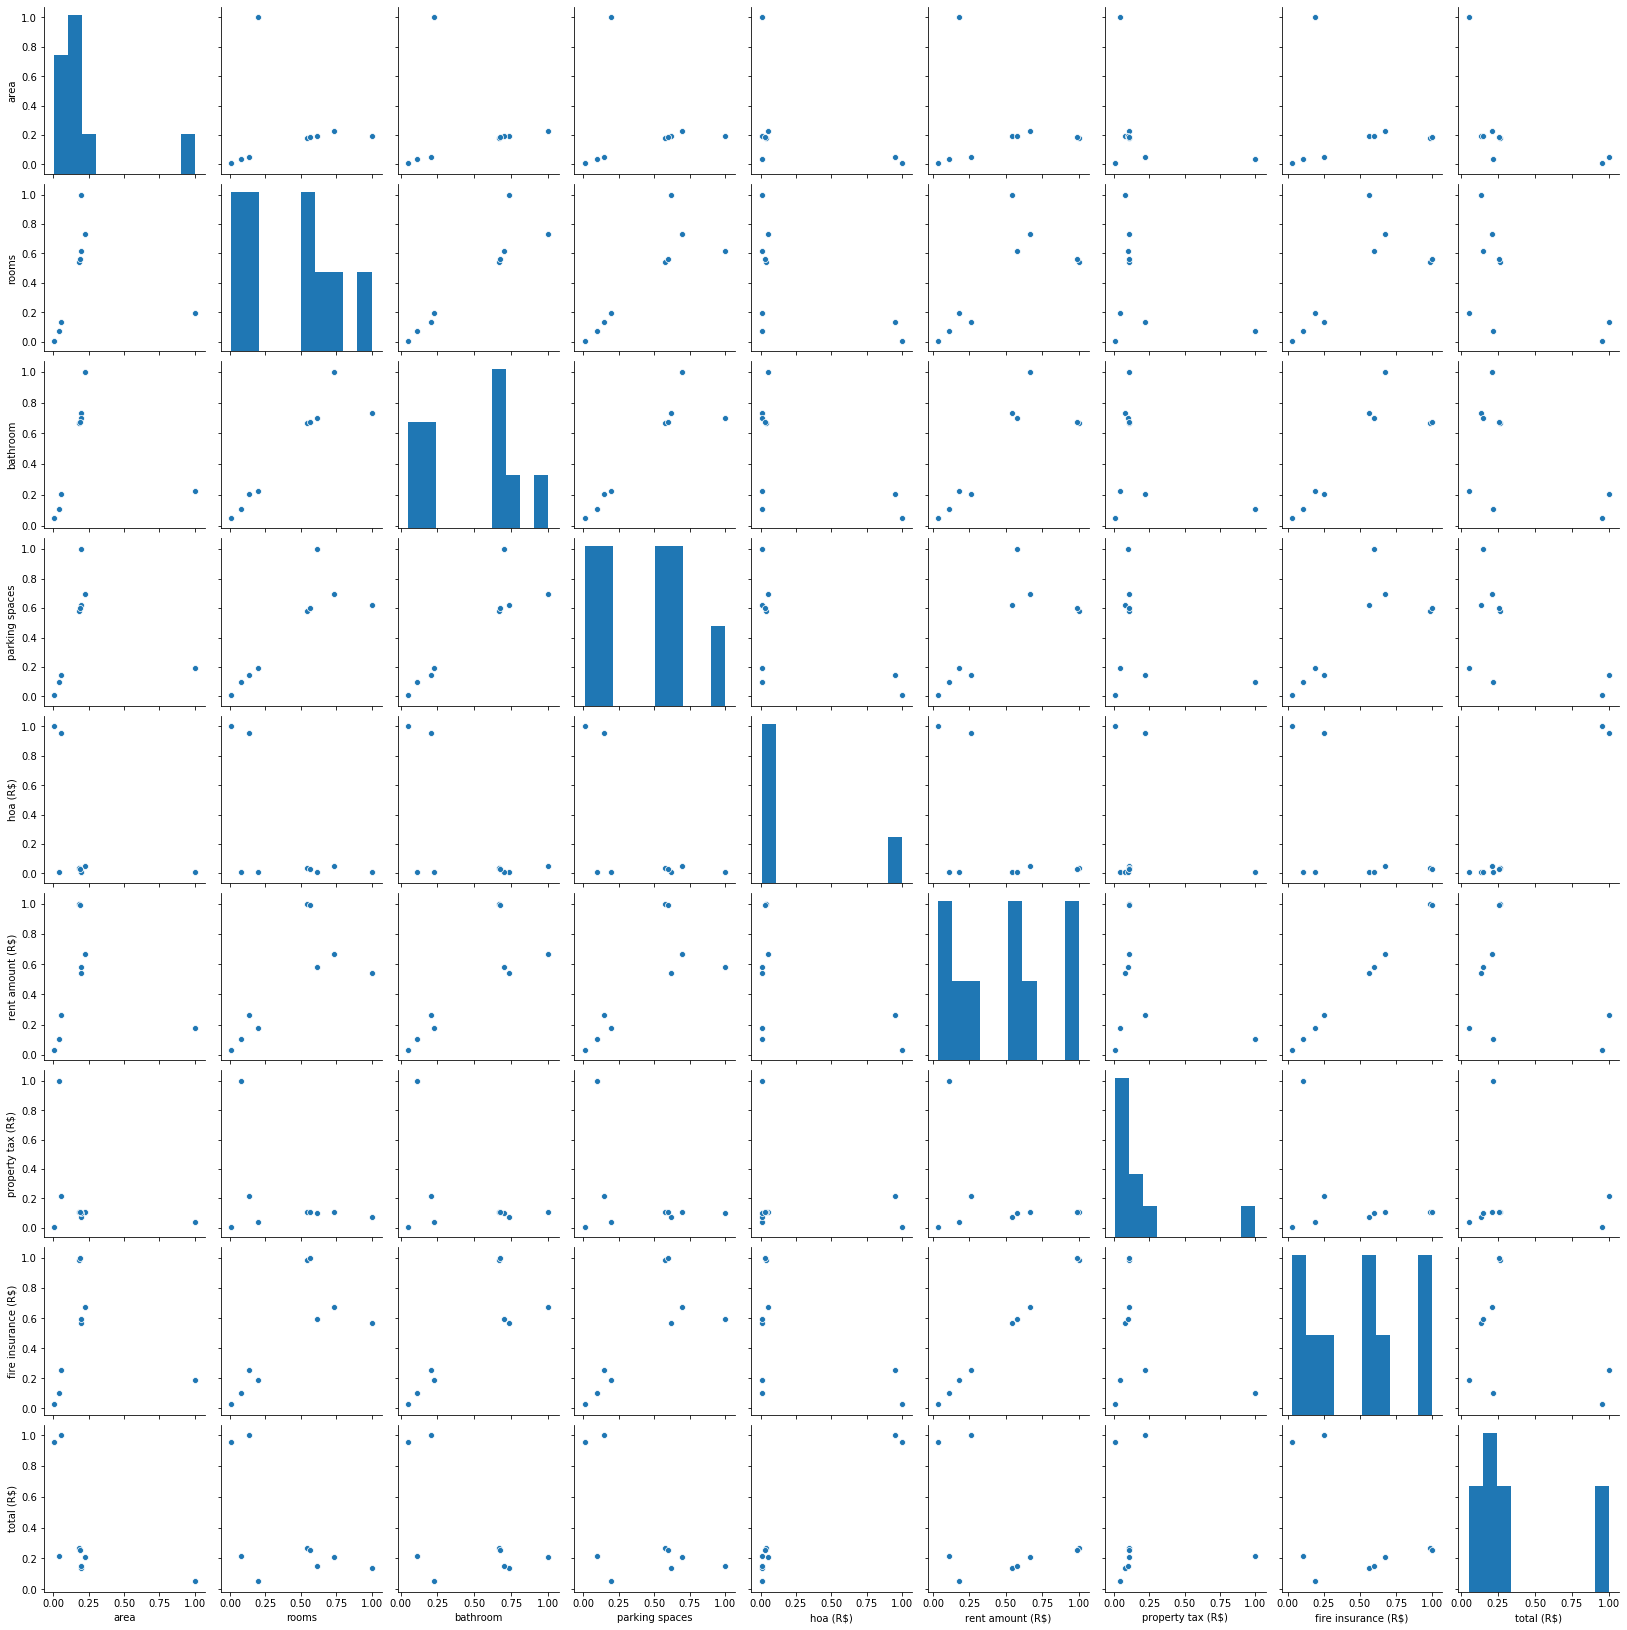

In [20]:
sns.pairplot(df.corr())

Now we will check how the data is been distributed for continuous features by plotting histogram.

In [21]:
def hist(col):
    plt.hist(df[col])
    plt.xlabel('features')
    plt.ylabel('count')

In [22]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [23]:
a = ['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 
     'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']

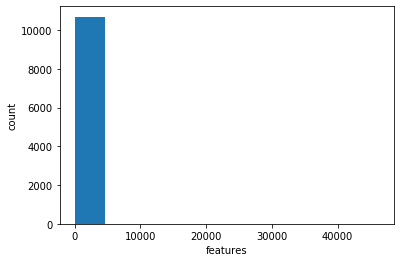

In [24]:
hist(a[0])

The feature area is mainly distributed between 0 to 5000 and its count is over 10000.

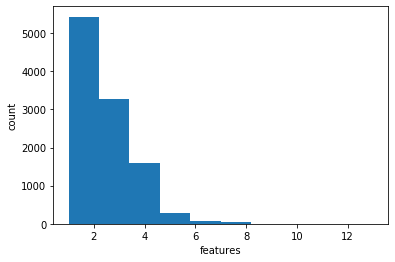

In [25]:
hist(a[1])

The feature room is right skewed along with some outliears.

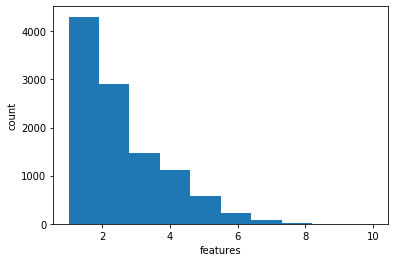

In [26]:
hist(a[2])

Feature bath-room is also right skewed with some outliers as well.

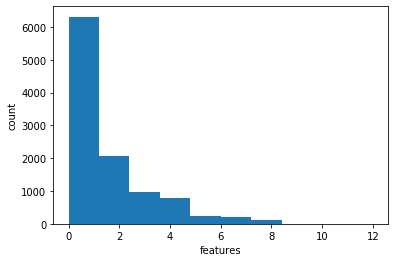

In [27]:
hist(a[3])

Feature parking spaces is right skewed as well.

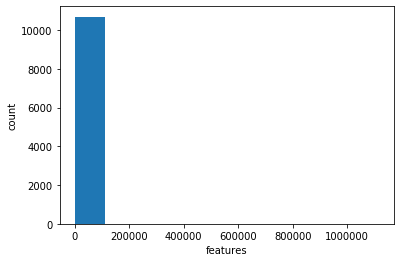

In [28]:
hist(a[4])

Feature hoa is distributed between 0 to 10000 and its count is over 10000.

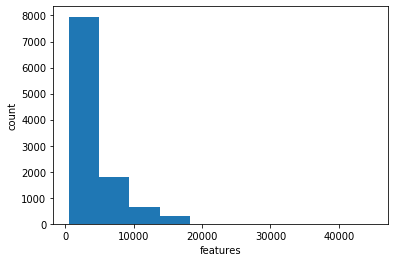

In [29]:
hist(a[5])

Rent amount is also right skewed.

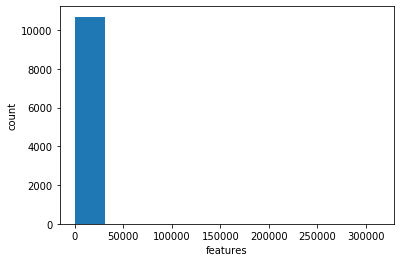

In [30]:
hist(a[6])

Property tax is also concentrated between 0 to around 25000 and count is over 10000.

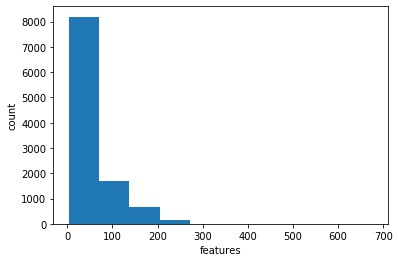

In [31]:
hist(a[7])

Fire insurance is again right skewed.

Conclusion from histogram plot: 
As we can see from all the above histograms features like room, bath room, parking spaces, rent amount and fire insurance are all rightly skewed with some outliers and other features like area, hoa and property tax are distributed within a certin range and their count is over 10000. These distribution will be fixed in the next part of the project.

# Understanding categorical data.

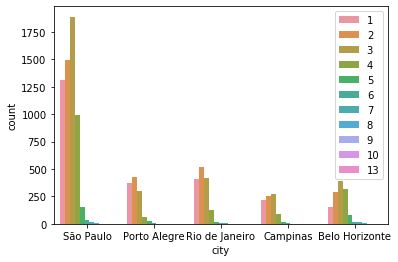

In [53]:
sns.countplot(x='city',hue='rooms',data=df)
plt.legend(loc = 'upper right')

Lets see how many rooms do each individual city have,
from the below plot the city sao paulo have have maximum 3-room houses then followed by 2-room and then then 1-room houses, the same trend is followed for other citites as well but where as cities with more than 3 rooms are very less.

In [33]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [34]:
cat = df['city'].unique()

In [35]:
cat

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [54]:
#sns.catplot(x= 'city', y ='rooms', data = df)

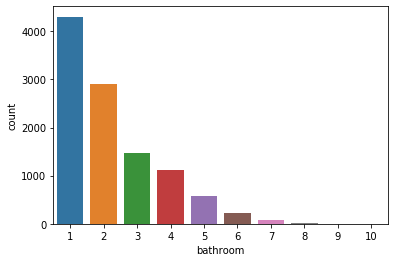

In [37]:
sns.countplot(df['bathroom'])

From the above plot we can observe that most of the people only prefer 1 bathroom.

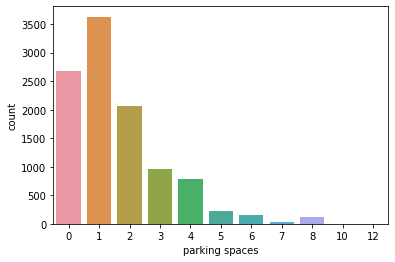

In [38]:
sns.countplot(df['parking spaces'])

In this plot we can observe two main things i.e maximum people prefer 1 parking space and second one is people who dont prefer any parking space are over 2500 also as number of parking spaces increases the count of people decreases.

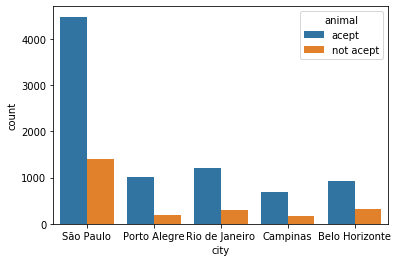

In [39]:
sns.countplot(x = df['city'], hue = df['animal'])

In this plot it shows that Sao Paulo is the city wich accepts most number of pets where as Belo Horizonte accetps least.

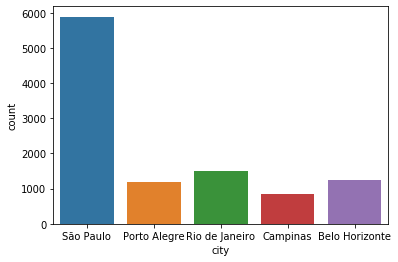

In [40]:
sns.countplot(df['city'])

From the above plot most people like to live in Sao Paulo.

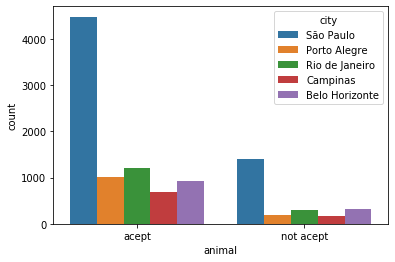

In [41]:
sns.countplot(x = df['animal'], hue = df['city'])

Sao Paulo is the only city that allows maximum number of pets, but also its the only city that rejects the pets as well.

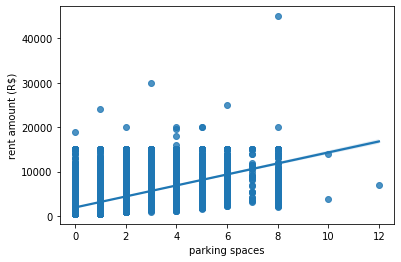

In [43]:
sns.regplot(df['parking spaces'],df['rent amount (R$)'])

From the above regplot shows that there is colinearity between parking spaces and rent amount.

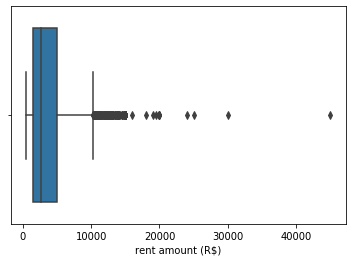

In [46]:
sns.boxplot(df['rent amount (R$)'])

The above plot shows that most of the data is concentrated between 0 to 10000 and after that there are some outliers that are scatterd, one of them crosses the range of 40000.